In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import os.path
from os import path
import seaborn as sns
from scipy import signal

In [147]:
## 1, -- KDP_nu
KDP_nu_name=["CIR40" ,"CIR50"]
KDP_nu=[1,1.25]

## 2,  --  KDP_w_sat_1  -- -
KDP_w_sat_1_name=["0_33" ,"0_66" ,"1_00"]
KDP_w_sat_1=[0.33, 0.66 ,1.00]

## 3,  --  KDP_w_sat_2  -- -
KDP_w_sat_2_name=["ImmunEscp_Jul" ,"ImmunEscp_Sep", "ImmunEscp_Nov"]
KDP_w_sat_2=[380, 442 ,503]

## 4,  --  KDP_g_1  -- -
KDP_g_1_name=["0_33", "0_66" ,"1_00"]
KDP_g_1=[0.33, 0.66, 1.00]

## 5,  --  KDP_g_2  -- -
KDP_g_2_name=["ABW150Days" ,"ABW180Days"]
KDP_g_2=[150 ,180]

## 6,  --  KDP_c_p  -- -
KDP_c_p_name=["Vaccine_PresentRate", "Vaccine_BestWeekAvg", "Vaccine_TwicePresent"]
KDP_c_p=[1 ,1.5, 2]

KDP_lambda_name=["SD_RA","SD_RAR","SD_RARF"]
KDP_lambda=[0,0.1,0.2]

### CODE FOR OBTAINING DATE VALUES ####################
start ="2020-07-01"
end  = "2022-06-30"

start = datetime.datetime.strptime(start, "%Y-%m-%d")
end = datetime.datetime.strptime(end, "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]



for i in range(len(date_generated)):
    date_generated[i] = date_generated[i].strftime("%d-%b-%y")


def ReadDF(fname,colString):
    df_master = pd.DataFrame()
    dateOfPeak = []
    dayOfPeak = []
    numAtPeak = []
    vaccRate = []
    numRead = 0
    for i in range(len(KDP_nu)):
            for j in range(len(KDP_w_sat_1)):
                for k in range(len(KDP_w_sat_2)):
                    for l in range(len(KDP_g_1_name)):
                        for m in range(len(KDP_g_2)):
                            for n in range(len(KDP_c_p)):
                                for o in range(len(KDP_lambda)):
                                    if(path.exists(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]+"/PopulationData/"+ fname)):
                                        df_temp = pd.read_csv(KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]+"/PopulationData/"+fname, delim_whitespace=True, header=1).transpose().loc[colString:]

                                        

                                        ExptId = KDP_nu_name[i] + "_" + KDP_w_sat_1_name[j] + "_" + KDP_w_sat_2_name[k] + "_" + \
                                                KDP_g_1_name[l] + "_" + KDP_g_2_name[m] + "_" + KDP_c_p_name[n] + "_" + \
                                                KDP_lambda_name[o]
                                        VaccineRt = str(KDP_c_p_name[n])
                                        CIR = str(KDP_nu_name[i]) 
                                        SD = str(KDP_lambda_name[o])
                                        KDPwsat = str(KDP_w_sat_2_name[k])

                                        numRead+=1


                                        df_temp['ID'] = ExptId
                                        df_temp['Vaccine Rate'] = VaccineRt
                                        df_temp['CIR'] = CIR
                                        df_temp['SD'] = SD
                                        df_temp['KDPwsat2']=KDPwsat
                                        df_temp['Scenario'] = numRead
                                        
                                                                
                                        df_master = pd.concat([df_master,df_temp])


    print(str(numRead) + " samples have been read ")
    return df_master
                                    

In [148]:



#### - Read the Nucleation Data
df_nucleation_total = ReadDF("CovidNucleation.data","Total")
df_nucleation_11 = ReadDF("CovidNucleation_11Yrs.data","Total")
df_nucleation_18 = ReadDF("CovidNucleation_18Yrs.data","Total")
df_nucleation_45 = ReadDF("CovidNucleation_45Yrs.data","Total")
df_nucleation_60 = ReadDF("CovidNucleation_60Yrs.data","Total")
df_nucleation_60plus = ReadDF("CovidNuclthegreaeation_Above60Yrs.data","Total")


## Read the VaccinationData
#### Read the Vaccination and the Antibody plots

df_antibody = ReadDF("Covid_Vaccinated.data","AntiBody")
df_Vaccinated = ReadDF("Covid_Antibody.data","AntiBody")


972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
972 samples have been read 
0 samples have been read 
972 samples have been read 
972 samples have been read 


In [6]:
################# --- READ THE MASTER DATA ------------- ####################################

df_active= ReadDF("CovidPopulation.data","Total")

972 samples have been read 


In [10]:
################ THIVIN ####################################
### Compute New dataframes for the ratio Quantities    -- Nucleation_age/Nucleation_Total

############# HARDCODED ##########################
##  Total of 730 days simulated 
ROWS = 730

### getList of columns
listOfCols = list(df_nucleation_total.columns.values)

#### create a copy of all the dataframes to store the ratio values
df_nucleation_11_ratio = df_nucleation_11.copy(deep=True)
df_nucleation_18_ratio = df_nucleation_18.copy(deep=True)
df_nucleation_45_ratio = df_nucleation_45.copy(deep=True)
df_nucleation_60_ratio = df_nucleation_60.copy(deep=True)
df_nucleation_60plus_ratio = df_nucleation_60plus.copy(deep=True)


##### Compute Ratios ##################

for i in range(ROWS + 1):
    df_nucleation_11_ratio[[i]] =  df_nucleation_11_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_18_ratio[[i]] =  df_nucleation_18_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_45_ratio[[i]] =  df_nucleation_45_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_60_ratio[[i]] =  df_nucleation_60_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 
    df_nucleation_60plus_ratio[[i]] =  df_nucleation_60plus_ratio[[i]].div(df_nucleation_total[[i]],axis=1) 

    
## remove the NA values
df_nucleation_11_ratio = df_nucleation_11_ratio.replace(np.nan,0)
df_nucleation_18_ratio = df_nucleation_18_ratio.replace(np.nan,0)
df_nucleation_45_ratio = df_nucleation_45_ratio.replace(np.nan,0)
df_nucleation_60_ratio = df_nucleation_60_ratio.replace(np.nan,0)
df_nucleation_60plus_ratio = df_nucleation_60plus_ratio.replace(np.nan,0)



KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

In [479]:

def plot_histo(df,X,hue,bw):
    df_plot=df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    sns.set(rc={'figure.figsize':(20,15)})
    sns.histplot(data=df_plot,x=X, hue=hue, binwidth=bw,multiple='dodge',fill=True)
    
    
def plot_violin(X,Y,df,hue,scale,cut,bandwidth):
    df_plot = df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    df_plot = df_plot.loc[df_plot[Y]< 4000000]
    sns.set(rc={'figure.figsize':(15,10)})
    sns.violinplot(x=X,y=Y,data=df_plot,hue=hue,split=True,scale=scale,cut=cut,bw=bandwidth)

def plot_catplot(X,Y,df,hue,scale,cut,bandwidth,xticks):
    df_plot = df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    df_plot = df_plot.loc[df_plot[Y]< 4000000]
#     sns.set(rc={'figure.figsize':(15,10)})
    fig = sns.catplot(x=X, y=Y,
                hue=hue, col="Vaccine Rate",data=df_plot,
                kind="violin", split=True,
                height=4, aspect=.9,scale=scale,cut=cut,bw=bandwidth);
    fig.set_xticklabels(xticks)

def timeSeriesPlot(X,Y,df,hue,scale,cut):
    df_plot = df
    df_plot.dropna(subset=['Date Of Peak'],inplace=True)
    df_plot = df_plot.loc[df_plot[Y]< 10]
    print(df_plot)
#     sns.set(rc={'figure.figsize':(15,10)})
    sns.catplot(x=X, y=Y,
                hue=hue, col="Vaccine Rate",data=df_plot,
                kind="violin", split=True,
                height=4, aspect=.9,scale=scale,cut=cut,bw=bandwidth);

In [12]:
##########--- Compute MeanData ----- ######
def AddMeanInfo(df):
    meanval = []
    minval = []
    maxval = []
    for i in range(731):
        meanval.append(np.mean(df[i]))
        minval.append(np.min(df[i]))
        maxval.append(np.max(df[i]))
    df.append(minval)
    df.append(maxval)
    df.append(meanval)
    

import scipy
def AddPeakInfo(df_master):
    dateOfPeak = []
    numAtPeak = []
    dateString = [] 
    for ia in range(len(df_master)):
        dop = scipy.signal.find_peaks(df_master.iloc[[ia]].transpose().loc[0:730,'Total'],distance = 20)
        for ib in range(len(dop[0])):
            if (dop[0][ib]>365):
                dateOfPeak.append(dop[0][ib])
                numAtPeak.append(df_master.iloc[ia,dop[0][ib]])
                dateString.append(date_generated[dop[0][ib]])
                break
            if(ib)==len(dop[0])-1:
                #print("Scenario " + str(ia) + " Does Not Have a Peak ")
                dateOfPeak.append(float('nan'))
                numAtPeak.append(float('nan'))
                dateString.append(float('nan'))
    df_master['Date Of Peak'] = dateOfPeak
    df_master['Number At Peak'] = numAtPeak
    df_master['DateString'] = dateString
    return df_master
        
        
    

In [13]:
### -- Compute the Peak Data of the Time Series --- #####

df_active = AddPeakInfo(df_active)

### -- Compute the Mean Data of the Time Series --- #####
# df_active = AddMeanInfo(df_active)

In [14]:
### PLOT THE OUTLIERS FOR BI MODAL PLOTS ######

KDPSAT2      = "ImmunEscp_Nov"
VACCINERATE  = "Vaccine_PresentRate"
CIRR         = "CIR40"

OutlierNov = df_active.loc[(df_active['KDPwsat2'] == KDPSAT2) &  (df_active['Vaccine Rate'] == VACCINERATE) & (df_active['CIR'] == CIRR)].copy(deep=True)

result  = OutlierNov.dropna(subset=['Date Of Peak'], inplace=False)
pd.set_option('display.max_rows', None, 'display.max_columns', None)
pd.set_option('display.max_colwidth', None)

print(result.loc[result['Date Of Peak'] >= 545][['ID','Date Of Peak','Number At Peak','DateString','Scenario']])

                                                                        ID  \
Total  CIR40_0_33_ImmunEscp_Nov_0_33_ABW150Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_33_ImmunEscp_Nov_0_33_ABW180Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_33_ImmunEscp_Nov_0_66_ABW150Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_33_ImmunEscp_Nov_0_66_ABW180Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_33_ImmunEscp_Nov_1_00_ABW150Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_33_ImmunEscp_Nov_1_00_ABW180Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_66_ImmunEscp_Nov_0_33_ABW150Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_66_ImmunEscp_Nov_0_33_ABW180Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_66_ImmunEscp_Nov_0_66_ABW150Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_66_ImmunEscp_Nov_0_66_ABW180Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_66_ImmunEscp_Nov_1_00_ABW150Days_Vaccine_PresentRate_SD_RAR   
Total  CIR40_0_66_ImmunEscp_Nov_1_00_ABW180Days_Vaccine_PresentR

In [ ]:
import csv  
import datetime
import math

def LinePlotter(scenarioID):
    days =  pd.date_range(start="2020-07-01", end="2022-06-30")
    #days =  pd.date_range(start="2020-07-01", end="2020-12-30")
    state_idx = 34 # total

    # Read state_wise_daily_KA.csv 
    state_wise_daily = pd.read_csv('data/state_wise_daily_KA.csv', delimiter = ',')
    #print(state_wise_daily.head())
    # get the series object
    if state_idx == 34:
        totaldata_all =  state_wise_daily.TT 
    elif state_idx == 4:
        totaldata_all =  state_wise_daily.BengaluruRural 
    elif state_idx == 5:
        totaldata_all =  state_wise_daily.BengaluruUrban 
    elif state_idx == 22:
        totaldata_all =  state_wise_daily.Mysuru 

    N_dataDays =  int(len(totaldata_all)/3)  # conf, recov, decea

    N_dataDays = N_dataDays

    actualAct = np.zeros(N_dataDays) 
    actualRecov = np.zeros(N_dataDays)  
    actualTot = np.zeros(N_dataDays) 
    actualDes = np.zeros(N_dataDays) 


    # Init Total, first day
    MarInitTot = totaldata_all[0]
    MarInitRecov = totaldata_all[1]
    MarInitDes = totaldata_all[2]
    


In [152]:
from scipy.stats import norm
import numpy
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing
import matplotlib.patches as mpatches
import warnings
warnings.filterwarnings('ignore')


fig, ax = plt.subplots(3,2,figsize=(50,40))
fig.tight_layout(pad=3.0)
plt.subplots_adjust(wspace=0.4,hspace=0.4)

 

start ="01/07/2020"
end  = "30/06/2022"

 

start = datetime.datetime.strptime(start, "%d/%m/%Y")
end = datetime.datetime.strptime(end, "%d/%m/%Y")
date_generated = [(start + datetime.timedelta(days=x)).date() for x in range(0, (end-start).days)]

 

 

colors = ['navy', 'green', 'darkorange']
kernel = 'epanechnikov'
KDPCIR=["CIR= 40", "CIR= 50"]
KDPImm=["Emergence of immune-escape new viral variant,Escape Period - July","Emergence of immune-escape new viral variant,Escape Period - September", "Emergence of immune-escape new viral variant,Escape Period  - November"]

 

LinePLotVals = np.empty(shape=(4,4,4,200))
LinePLotX = np.empty(shape=(4,4,4,200))

 

for i in range(3):
    for j in range(2):
        df_kde=df_active.copy(deep=True)
        df_kde=df_kde[df_kde['CIR']==KDP_nu_name[j]]
        df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
        df_kde.dropna(subset=['Date Of Peak'],inplace=True)
        
        for k in range(3):
            df_kdep = df_kde.copy(deep=True)
            df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]
            
            hist = sns.histplot(ax=ax[i,j],data=df_kdep,x='Date Of Peak',stat='probability',kde=True,kde_kws={"bw_adjust":0.25},color=colors[k],bins=20)
            
            ll = hist.get_lines()[k].get_data()
            LinePLotVals[i][j][k] = np.asarray(ll[1])
            LinePLotX[i][j][k] = np.asarray(ll[0])
            ax[i,j].containers[0].remove() # remove the bars
            #ax[i,j].relim() # the axis limits need to be recalculated without the bars
            #ax[i,j].autoscale_view()
            #ax[i,j].legend(loc='upper right')
            blue_patch=mpatches.Patch(color='navy',label='Vaccination At Present Rate')
            green_patch=mpatches.Patch(color='green',label='Vaccination At Present Rate+50%')
            orange_patch=mpatches.Patch(color='darkorange',label='Vaccination At Present Rate+100%')
            ax[i,j].legend(handles=[blue_patch,green_patch,orange_patch])
            ax[i,j].set_title(KDPImm[i]+", "+ KDPCIR[j])
            ax[i,j].set_xlabel("Date Of Peak")
            #ax[i,j].set_xlim([400,700])
            ax[i,j].set_ylim([0,0.4])
            
            
            xt = []
            xtl = []
        
            nTicks = 10;

 

            dt = int(360/(nTicks + 1));

 

            for tickIndex in range(nTicks):
                xtl.append(date_generated[360 + tickIndex*dt]);
                xt.append(360 + tickIndex*dt);
                pass;

 

            ax[i,j].set_xticks(xt);
            ax[i,j].set_xticklabels(xtl);
            ax[i,j].tick_params(axis='x', rotation=15);
plt.show()


SyntaxError: invalid syntax (584893304.py, line 58)

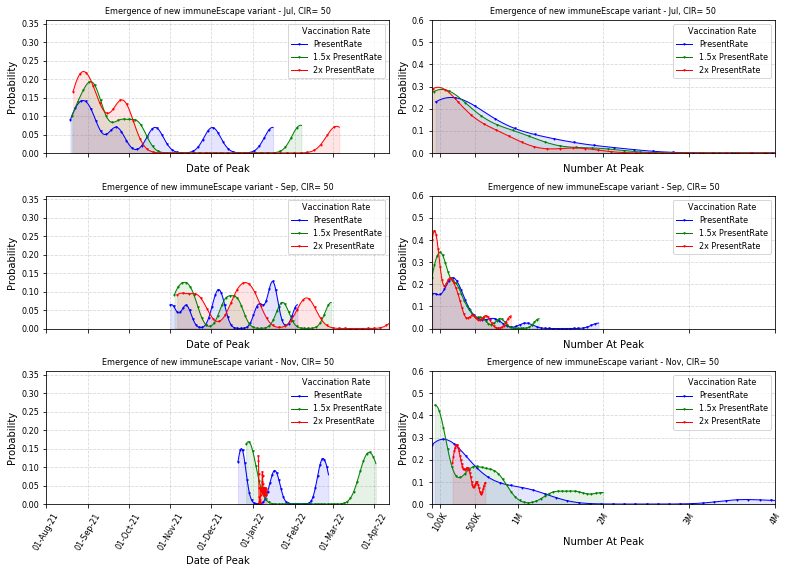

<Figure size 432x288 with 0 Axes>

In [270]:
###################### ___ PLOTTING SCRIPT _______________ ######################################

## 0 - cir40, 1-cir50
CIRVARIANT = 1;

####### -- PLotter Parameters -- ######
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Set plotting parameters   -- Day of Peak
markersizep = 1.5
nTicks = 10
startDay = 400
endDay = 700
dt = int((endDay-startDay)/(nTicks + 1));
xtl = []
xt = [396,427,457,488,518,549,580,608,639]
for tickIndex in range(len(xt)):
    xtl.append(date_generated[xt[tickIndex]]);
    pass;


## Set plotting parameters   -- Number at Peak
markersizep = 1.5
nTicks_C = 10
startDay_C = 0
endDay_C = 4e6
xt_C = [0,100000,500000,1000000,2000000,3000000,4000000]
xtl_C = ["0","100K","500K","1M","2M","3M","4M"];




fig, ax = plt.subplots(3,2,figsize=(11,8),sharex=False,sharey=False)
fig.tight_layout(pad=2.6)

colorVal = ['blue','green','red']
marker  = ['v','v','v']
legend = ["PresentRate","1.5x PresentRate","2x PresentRate"]
KDPImm = ["Emergence of new immuneEscape variant - Jul", "Emergence of new immuneEscape variant - Sep","Emergence of new immuneEscape variant - Nov" ]

j=CIRVARIANT;
col=0
for i in range(3):
    for k in range(3):
#             print( "(i,j) = (", str(i) ,"," ,str(j),") ",   " K val : " , str(k) )
#            sns.lineplot(ax=ax[i,j],data=LinePLotVals[i][j][k],label=KDP_c_p_name[k])
        ax[i,col].plot(LinePLotX[i][j][k],LinePLotVals[i][j][k],label = legend[k],linewidth=1,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=5)
        #ax[i,j].containers[0].remove() # remove the bars
        #ax[i,j].relim() # the axis limits need to be recalculated without the bars
        #ax[i,j].autoscale_view()
        ax[i,col].fill_between(LinePLotX[i][j][k],LinePLotVals[i][j][k],0, alpha=0.1, color=colorVal[k])


    ax[i,col].legend(title='Vaccination Rate',fancybox=True,loc='upper right')
    ax[i,col].set_title(KDPImm[i] +", "+ KDPCIR[j])
    ax[i,col].set_ylabel("Probability")
    ax[i,col].set_xlabel("Date of Peak")
    ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
    ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
    ax[i,col].set_xlim(right=endDay-50)
    ax[i,col].set_ylim((0,0.36))
    ax[i,col].set_xticks(xt);
    ax[i,col].set_xticklabels([]);
    
ax[2,col].set_xticks(xt);
ax[2,col].set_xticklabels(xtl);
ax[2,col].tick_params(axis='x', rotation=60);

### --- NUMBER OF CASES ----- ######

col=1
    
for i in range(3):
    for k in range(3):
#             print( "(i,j) = (", str(i) ,"," ,str(j),") ",   " K val : " , str(k) )
#            sns.lineplot(ax=ax[i,j],data=LinePLotVals[i][j][k],label=KDP_c_p_name[k])
        ax[i,col].plot(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],label = legend[k],linewidth=1,color=colorVal[k],marker=marker[k],markersize=markersizep,markevery=5)
        #ax[i,j].containers[0].remove() # remove the bars
        #ax[i,j].relim() # the axis limits need to be recalculated without the bars
        #ax[i,j].autoscale_view()
        ax[i,col].fill_between(LinePLotX_Cases[i][j][k],LinePLotVals_Cases[i][j][k],0, alpha=0.1, color=colorVal[k])
        

    ax[i,col].legend(title='Vaccination Rate',fancybox=True,loc='upper right')
    ax[i,col].set_title(KDPImm[i] +", "+ KDPCIR[j])
    ax[i,col].set_ylabel("Probability")
    ax[i,col].set_xlabel("Number At Peak")
    ax[i,col].grid(b=True, which='major', color='grey', linestyle='--',alpha=0.3)
    ax[i,col].grid(b=True, which='minor', color='b', linestyle='--',alpha=0.1)
    ax[i,col].set_xlim(left=startDay_C,right=endDay_C)
    ax[i,col].set_xticks(xt_C);
    ax[i,col].set_xticklabels([]);
    ax[i,col].set_ylim((0,0.6))
    
    
ax[2,col].set_xticks(xt_C);
ax[2,col].set_xticklabels(xtl_C);
ax[2,col].tick_params(axis='x', rotation=60);

plt.tight_layout()

if(CIRVARIANT==0): 
    plt.savefig("CIR40.pdf",dpi=400)
    plt.savefig("CIR40.png",dpi=400)
else:
    plt.savefig("CIR50.pdf",dpi=400)
    plt.savefig("CIR50.png",dpi=400)

plt.show()
plt.draw()


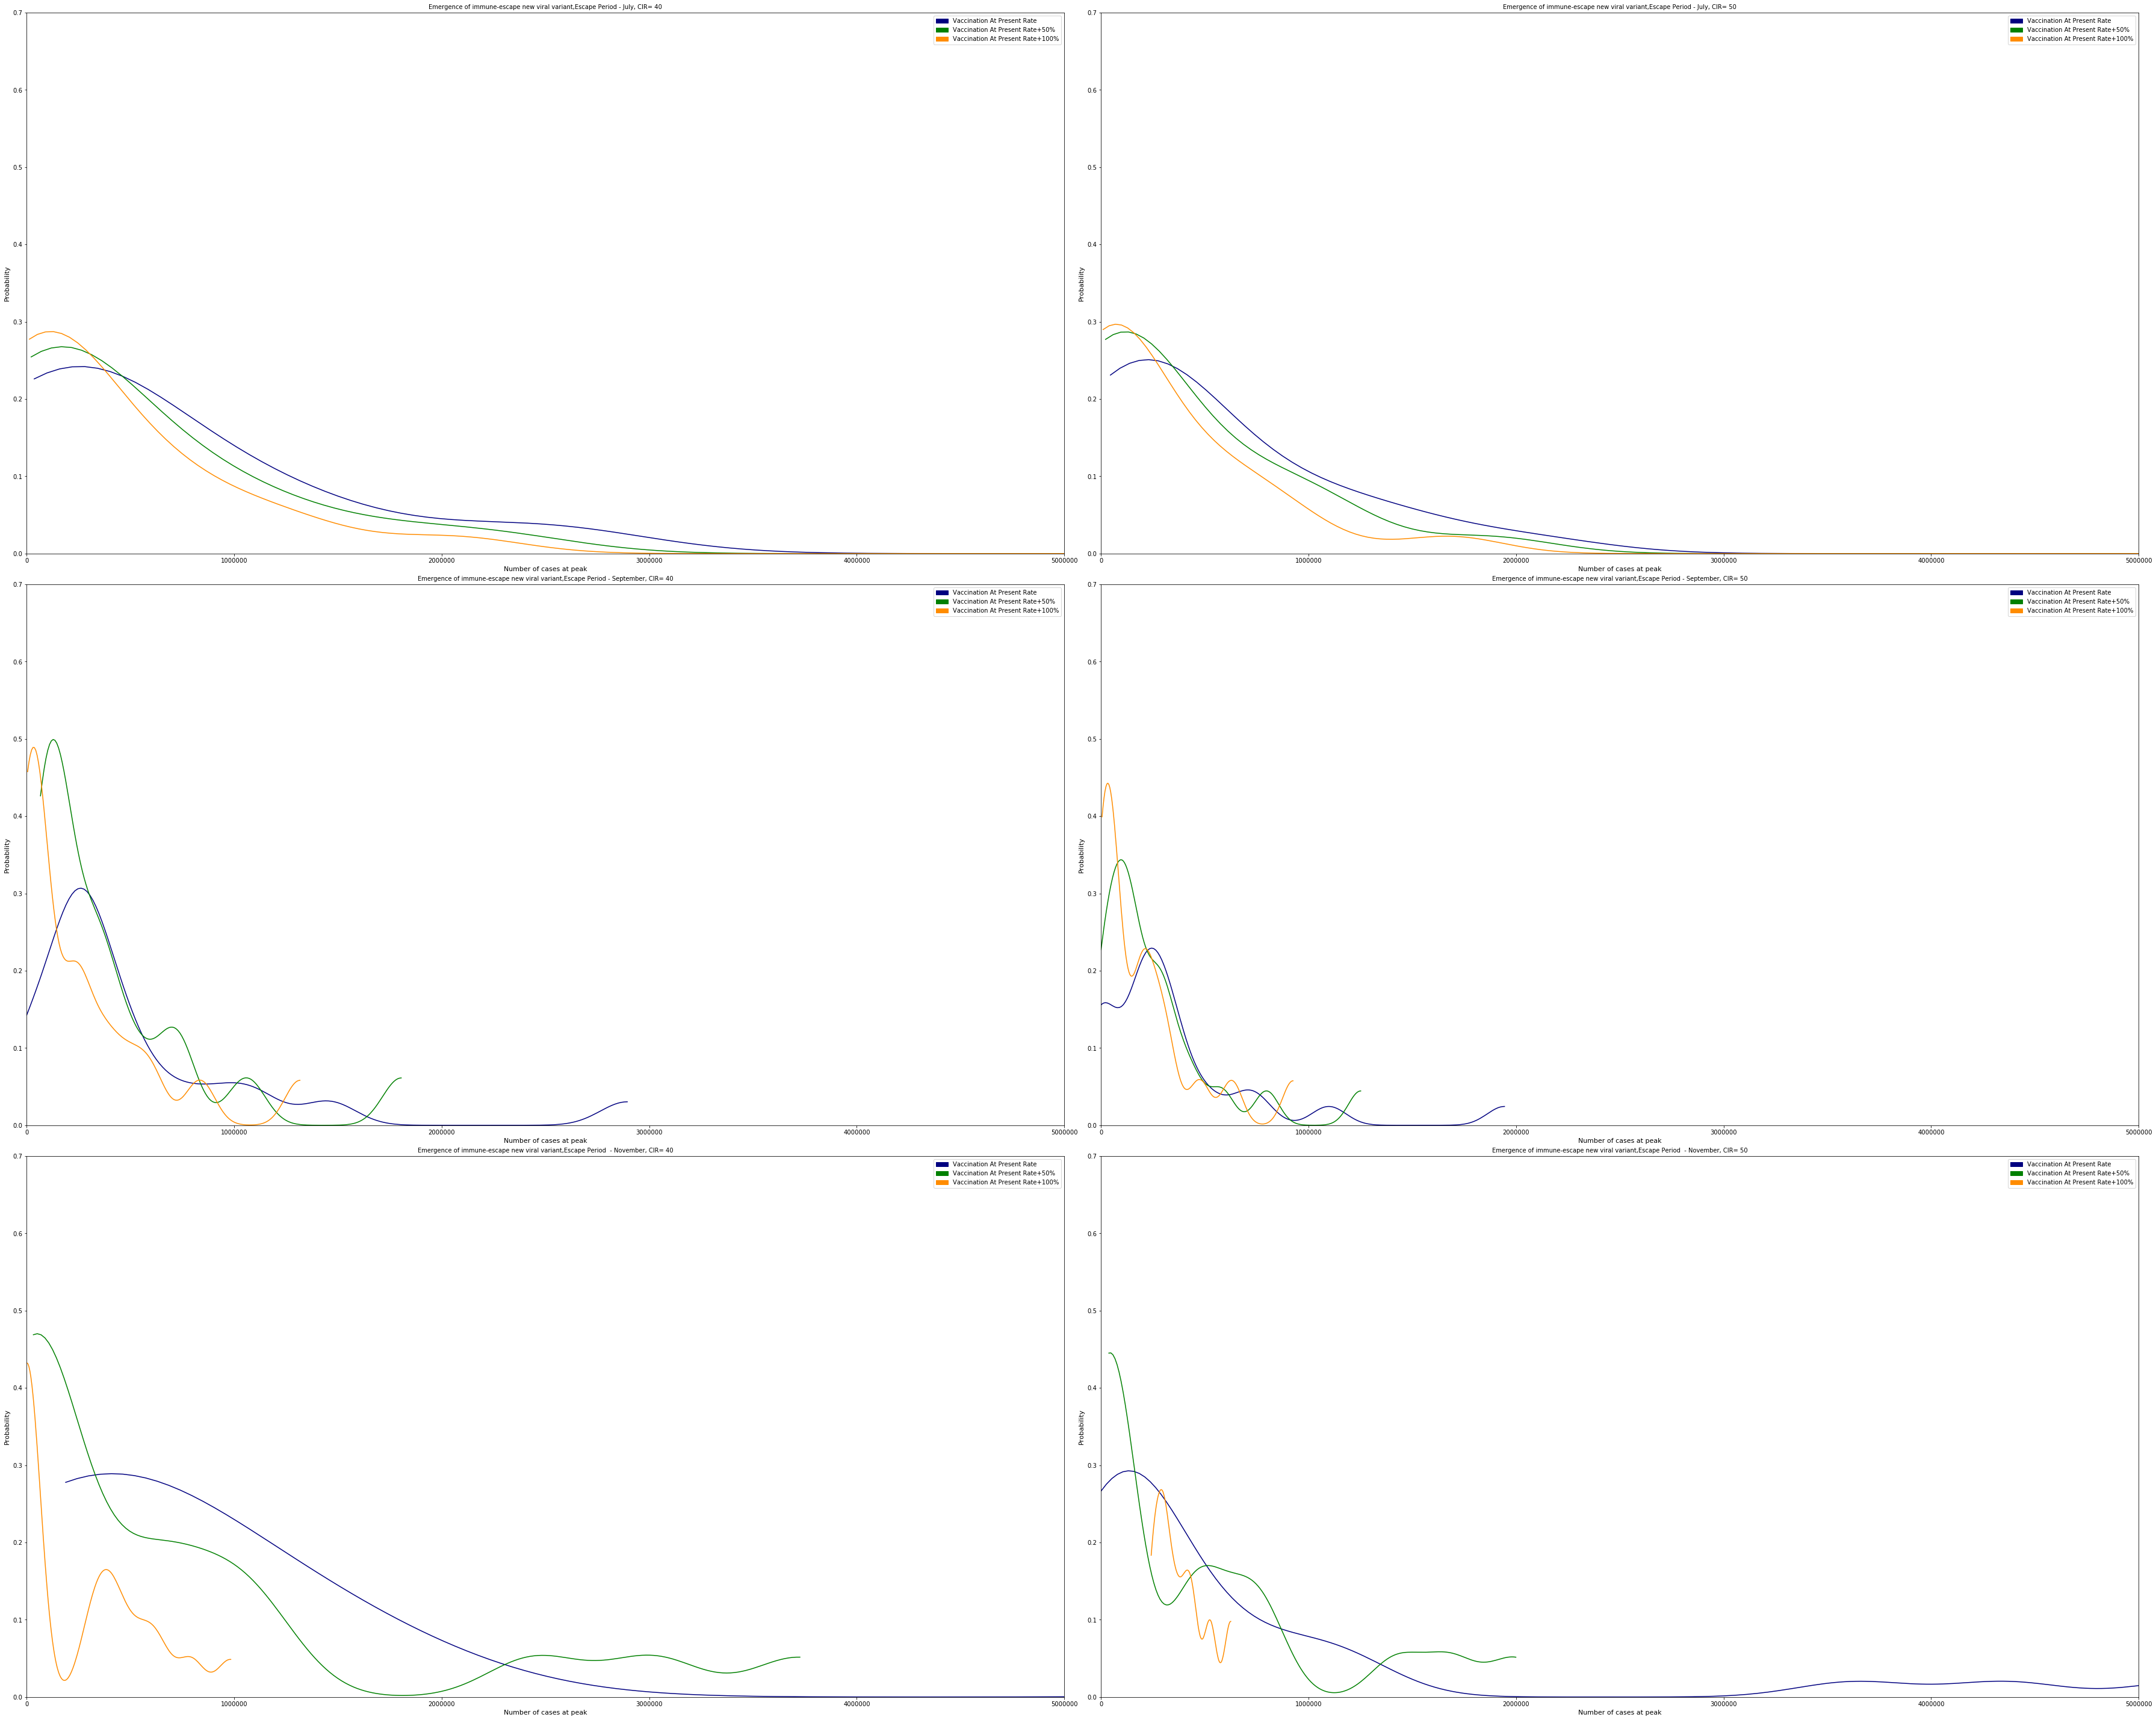

In [195]:
####################################_____ FOR NUMBER OF CASES ______________________ #################################
from scipy.stats import norm
import numpy
import sklearn
from sklearn.neighbors import KernelDensity
from sklearn.utils.fixes import parse_version
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing
import matplotlib.patches as mpatches
fig, ax = plt.subplots(3,2,figsize=(50,40))
fig.tight_layout(pad=3.0)


colors = ['navy', 'green', 'darkorange']
kernel = 'epanechnikov'
KDPCIR=["CIR= 40", "CIR= 50"]
KDPImm=["Emergence of immune-escape new viral variant,Escape Period - July","Emergence of immune-escape new viral variant,Escape Period - September", "Emergence of immune-escape new viral variant,Escape Period  - November"]

 

LinePLotVals_Cases = np.empty(shape=(4,4,4,200))
LinePLotX_Cases = np.empty(shape=(4,4,4,200))
 

for i in range(3):
    for j in range(2):
        df_kde=df_active.copy(deep=True)
        df_kde=df_kde[df_kde['CIR']==KDP_nu_name[j]]
        df_kde=df_kde[df_kde['KDPwsat2']==KDP_w_sat_2_name[i]]
        df_kde.dropna(subset=['Date Of Peak'],inplace=True)
        a = [[] for x in range(k+1)]
        for k in range(3):
            df_kdep = df_kde.copy(deep=True)
            df_kdep = df_kdep[df_kdep['Vaccine Rate']==KDP_c_p_name[k]]
            
            hist = sns.histplot(ax=ax[i,j],data=df_kdep,x='Number At Peak',stat='probability',kde=True,kde_kws={"bw_adjust":0.42},color=colors[k])
            
            ll = hist.get_lines()[k].get_data()
            LinePLotVals_Cases[i][j][k] = np.asarray(ll[1])
            LinePLotX_Cases[i][j][k] = np.asarray(ll[0])
            ax[i,j].containers[0].remove() # remove the bars
#             ax[i,j].containers[0].remove() # remove the bars
            #ax[i,j].relim() # the axis limits need to be recalculated without the bars
            #ax[i,j].autoscale_view()
            #ax[i,j].legend(loc='upper right')
            blue_patch=mpatches.Patch(color='navy',label='Vaccination At Present Rate')
            green_patch=mpatches.Patch(color='green',label='Vaccination At Present Rate+50%')
            orange_patch=mpatches.Patch(color='darkorange',label='Vaccination At Present Rate+100%')
            ax[i,j].legend(handles=[blue_patch,green_patch,orange_patch])
            ax[i,j].set_title(KDPImm[i]+", "+ KDPCIR[j])
            ax[i,j].set_xlabel("Number of cases at peak")
            ax[i,j].set_xlim([0,e6])
            ax[i,j].set_ylim([0,0.7])
         
plt.show()




'01-Aug-21'